In [124]:
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [125]:
em1 = "Onde você realizou seus estudos de ensino médio?"
em2 = "Onde você cursou o ensino médio?"

base_path = "dados/"

In [126]:
def filter_fase_tipo(string, fase, tipo):
    sfase = string[5:][:1]
    stipo = string[7:][:1]
    if sfase == str(fase) and stipo == str(tipo):
        return True
    else:
        return False

In [127]:
#Localização dos arquivos
dir_files = os.listdir(base_path)
quest_files = [base_path + file for file in dir_files if len(file[:-5]) == 4]
quest_files = sorted(quest_files)
dat_files = [base_path + file for file in dir_files if len(file[:-5]) == 8]

inscritos_files = sorted([file for file in dat_files if filter_fase_tipo(os.path.basename(file), 1, 2)])
matriculados_files = sorted([file for file in dat_files if filter_fase_tipo(os.path.basename(file), 4, 2)])

In [136]:
def gogo_dataset(files):
    output = {"ano": [], "cor": [], "escola": [], "renda": [], "sexo": []}

    for i in range(len(quest_files)):
        ano = os.path.basename(quest_files[i])[:4]
        ano = int(ano)
        quest = pd.read_json(quest_files[i])

        cor_index = quest[quest[3].str.contains("sua cor")][0].values[0] - 1
        renda_index = quest[quest[3].str.contains("renda familiar mensal")][0].values[0] - 1
        sexo_index = quest[quest[3].str.contains("sexo")][0].values[0] - 1
        
        magic = 2

        if ano == 2006:
            magic = 3
        elif 2007 <= ano <= 2009:
            magic = 4
        elif 2010 <= ano <= 2013:
            magic = 5

        if int(ano) <= 2012:
            escola_index = quest[quest[3].str.contains(em1)][0].values[0] - 1
        else:
            escola_index = quest[quest[3].str.contains(em2)][0].values[0] - 1

        ds = pd.read_json(files[i])
        ds = ds[6].tail(magic).head(1).values[0]
        resp_cor = ds[cor_index]
        resp_escola = ds[escola_index]
        resp_renda = ds[renda_index]
        resp_sexo = ds[sexo_index]
        output["ano"].append(ano)
        output["cor"].append(resp_cor)
        output["escola"].append(resp_escola)
        output["renda"].append(resp_renda)
        output["sexo"].append(resp_sexo)
        
    return output

In [137]:
res_insc = gogo_dataset(inscritos_files)
res_matr = gogo_dataset(matriculados_files)

In [138]:
res_insc["ano"]

[2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

Masculino - Slope: 0.001481, Intercept: -2.88, P: 0.00217, R:0.71, std:0.000395
Feminino - Slope: 0.001361, Intercept: -2.67, P: 0.00428, R:0.67, std:0.000400


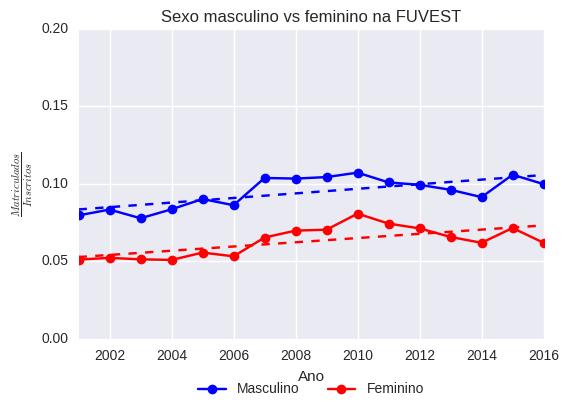

In [176]:
masc = []
fem = []
x = []

for i in range(len(res_insc["sexo"])):
    x.append(res_insc["ano"][i])
    masc.append(res_matr["sexo"][i][1] / res_insc["sexo"][i][1])
    fem.append(res_matr["sexo"][i][2] / res_insc["sexo"][i][2])

ax = plt.subplot(111)
plot_generic(x, masc, "Masculino", "blue", slope=True)
plot_generic(x, fem, "Feminino", "red", slope=True)
ax.ticklabel_format(useOffset=False)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          ncol=3, fancybox=True, shadow=True)
plt.ylim(0, 0.2)
plt.title("Sexo masculino vs feminino na FUVEST")
plt.xlabel("Ano")
plt.ylabel("$\\frac{Matriculados}{Inscritos}$")
plt.xlim(2001, 2016)
plt.show()

Inscritos - Slope: -0.168544, Intercept: 347.11, P: 0.00065, R:-0.91, std:0.028986
Matriculados - Slope: -0.160925, Intercept: 333.16, P: 0.00134, R:-0.89, std:0.031322


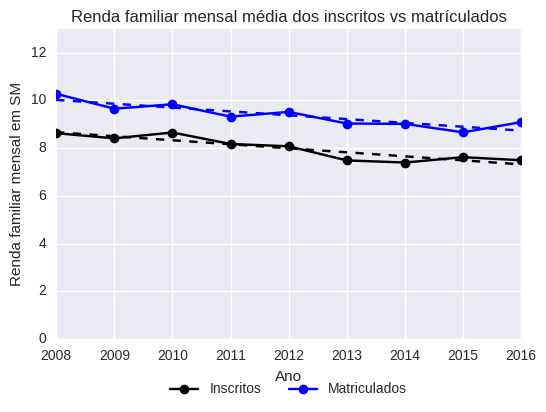

In [184]:
renda_insc_media = []
renda_matr_media = []

def sal_ponderate(arr):
    arr = np.array(arr)
    return np.sum(0.5 * arr[1] + 1.5 * arr[2] + 2.5 * arr[3] + 4 * arr[4] + 6.5 * arr[5] +
                  8.5 * arr[6] + 12.5 * arr[7] + 17.5 * arr[8] + 22.5 * arr[9]) / np.sum(arr[0])

for i in range(len(res_insc["renda"])):
    ano = res_insc["ano"][i]
    if ano < 2008:
        continue
    
    renda_insc_media.append(sal_ponderate(res_insc["renda"][i]))
    renda_matr_media.append(sal_ponderate(res_matr["renda"][i]))

    
ax = plt.subplot(111)
plot_generic(xr, renda_insc_media, "Inscritos", "black", slope=True)
plot_generic(xr, renda_matr_media, "Matriculados", "blue", slope=True)
ax.ticklabel_format(useOffset=False)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          ncol=3, fancybox=True, shadow=True)
plt.ylim(0, 13)
plt.title("Renda familiar mensal média dos inscritos vs matrículados")
plt.xlabel("Ano")
plt.ylabel("Renda familiar mensal em SM")
plt.xlim(2008, 2016)
plt.show()

Geral - Slope: -0.000965, Intercept: 2.03, P: 0.16971, R:-0.50, std:0.000631
$x > 1SM$ - Slope: 0.002210, Intercept: -4.39, P: 0.35643, R:0.35, std:0.002238
$1SM < x < 2SM$ - Slope: 0.001364, Intercept: -2.70, P: 0.18369, R:0.49, std:0.000925
$2SM < x < 3SM$ - Slope: -0.000046, Intercept: 0.15, P: 0.96437, R:-0.02, std:0.000983
$3SM < x < 5SM$ - Slope: -0.000765, Intercept: 1.61, P: 0.24048, R:-0.44, std:0.000596
$5SM < x < 7SM$ - Slope: -0.001455, Intercept: 3.01, P: 0.06272, R:-0.64, std:0.000658
$7SM < x < 10SM$ - Slope: -0.001402, Intercept: 2.92, P: 0.02674, R:-0.73, std:0.000502
$10SM < x < 15SM$ - Slope: -0.001400, Intercept: 2.92, P: 0.01921, R:-0.75, std:0.000463
$15SM < x < 20SM$ - Slope: 0.000423, Intercept: -0.75, P: 0.41594, R:0.31, std:0.000489
$20SM < x$ - Slope: 0.001275, Intercept: -2.45, P: 0.06835, R:0.63, std:0.000592


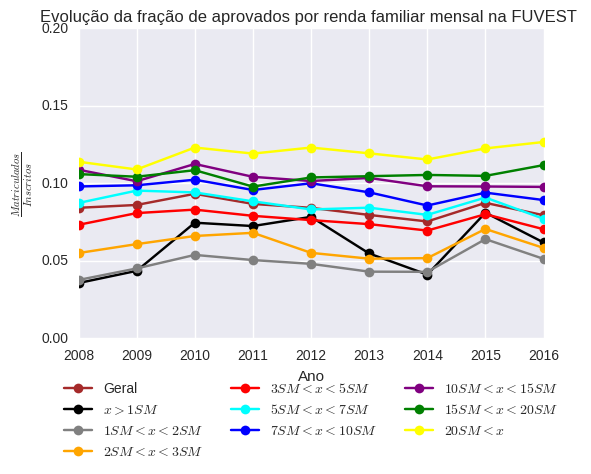

In [186]:
xr = []
y = []
y_05sm = []
y_10sm = []
y_20sm = []
y_40sm = []
y_60sm = []
y_85sm = []
y_125sm = []
y_175sm = []
y_230sm = []

for i in range(len(res_insc["renda"])):
    ano = res_insc["ano"][i]
    if ano < 2008:
        continue
    
    xr.append(ano)
    y.append(res_matr["renda"][i][0] / res_insc["renda"][i][0])
    y_05sm.append(res_matr["renda"][i][1] / res_insc["renda"][i][1])
    y_10sm.append(res_matr["renda"][i][2] / res_insc["renda"][i][2])
    y_20sm.append(res_matr["renda"][i][3] / res_insc["renda"][i][3])
    y_40sm.append(res_matr["renda"][i][4] / res_insc["renda"][i][4])
    y_60sm.append(res_matr["renda"][i][5] / res_insc["renda"][i][5])
    y_85sm.append(res_matr["renda"][i][6] / res_insc["renda"][i][6])
    y_125sm.append(res_matr["renda"][i][7] / res_insc["renda"][i][7])
    y_175sm.append(res_matr["renda"][i][8] / res_insc["renda"][i][8])
    y_230sm.append(res_matr["renda"][i][9] / res_insc["renda"][i][9])
    
ax = plt.subplot(111)

plot_generic(xr, y, "Geral", "brown")
plot_generic(xr, y_05sm, "$x > 1SM$", "black")
plot_generic(xr, y_10sm, "$1SM < x < 2SM$", "grey")
plot_generic(xr, y_20sm, "$2SM < x < 3SM$", "orange")
plot_generic(xr, y_40sm, "$3SM < x < 5SM$", "red")
plot_generic(xr, y_60sm, "$5SM < x < 7SM$", "cyan")
plot_generic(xr, y_85sm, "$7SM < x < 10SM$", "blue")
plot_generic(xr, y_125sm, "$10SM < x < 15SM$", "purple")
plot_generic(xr, y_175sm, "$15SM < x < 20SM$", "green")
plot_generic(xr, y_230sm, "$20SM < x$", "yellow")
ax.ticklabel_format(useOffset=False)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          ncol=3, fancybox=True, shadow=True)
plt.ylim(0, 0.2)
plt.title("Evolução da fração de aprovados por renda familiar mensal na FUVEST ")
plt.xlabel("Ano")
plt.ylabel("$\\frac{Matriculados}{Inscritos}$")
plt.xlim(2008, 2016)
plt.show()

In [ ]:
x = []
y_geral = []
y_branco = []
y_pardo = []
y_preto = []
y_indio = []
y_amarelo = []
for i in range(len(res_insc["cor"])):
    
    ###cor
    x.append(res_insc["ano"][i])
    y_geral.append(res_matr["cor"][i][0] / res_insc["cor"][i][0])
    y_branco.append(res_matr["cor"][i][1] / res_insc["cor"][i][1])
    
    if res_insc["ano"][i] > 2012:
        y_pardo.append(res_matr["cor"][i][3] / res_insc["cor"][i][3])
        y_amarelo.append(res_matr["cor"][i][4] / res_insc["cor"][i][4])
    else:
        y_pardo.append(res_matr["cor"][i][4] / res_insc["cor"][i][4])
        y_amarelo.append(res_matr["cor"][i][3] / res_insc["cor"][i][3])
    y_preto.append(res_matr["cor"][i][2] / res_insc["cor"][i][2])

    y_indio.append(res_matr["cor"][i][5] / res_insc["cor"][i][5])
    
    ###renda
    
    
    ###escola
    
    
    ###sexo
    
x = np.array(x)

Todos - Slope: 0.001513, Intercept: -2.96, P: 0.00180, R:0.72, std:0.000394
Brancos - Slope: 0.001471, Intercept: -2.88, P: 0.00171, R:0.72, std:0.000380
Pretos - Slope: 0.002633, Intercept: -5.25, P: 0.00014, R:0.81, std:0.000508
Pardos - Slope: 0.002193, Intercept: -4.35, P: 0.00036, R:0.78, std:0.000469
Amarelos - Slope: 0.001106, Intercept: -2.11, P: 0.07431, R:0.46, std:0.000573
Indígenas - Slope: 0.001271, Intercept: -2.50, P: 0.06246, R:0.48, std:0.000628


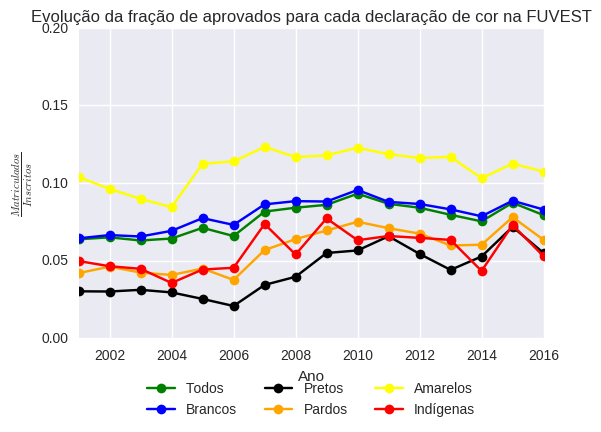

In [187]:
ax = plt.subplot(111)
def plot_generic(x, y, label, color, slope=False):
    x = np.array(x)
    y = np.array(y)
    xx = x
    r = st.linregress(xx, y)
    if slope is True:
        plt.plot(x, x * r.slope + r.intercept, '--', color=color)
    plt.plot(x, y, '-o', color=color, label=label)
    print("%s - Slope: %.6f, Intercept: %.2f, P: %.5f, R:%.2f, std:%.6f" % (label, r.slope, r.intercept, r.pvalue,
                                                                            r.rvalue, r.stderr))
plot_generic(x, y_geral, "Todos", "green")
plot_generic(x, y_branco, "Brancos", "blue")
plot_generic(x, y_preto, "Pretos", "black")
plot_generic(x, y_pardo, "Pardos", "orange")
plot_generic(x, y_amarelo, "Amarelos", "yellow")
plot_generic(x, y_indio, "Indígenas", "red")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          ncol=3, fancybox=True, shadow=True)
plt.ylim(0, 0.2)
plt.title("Evolução da fração de aprovados para cada declaração de cor na FUVEST")
plt.xlabel("Ano")
plt.ylabel("$\\frac{Matriculados}{Inscritos}$")
plt.xlim(2001, 2016)
plt.show()

In [233]:
n = 11
aa = pd.read_json(quest_files[n])
bb = pd.read_json(inscritos_files[n])
aa[aa[3].str.contains("médio")]

,0,1,2,3,4,5,6,7,8,9,10,11,12
5,6,5,6,Que tipo de ensino médio você realizou?,Ensino médio comum,"Curso técnico (Industrial, Eletrônica, Química...",Curso para magistério (antigo normal),Educação de Jovens e Adultos (antigo supletivo...,Outro,None,None,None,None
6,7,9,7,Onde você realizou seus estudos de ensino médio?,Só em escola Pública Municipal no Brasil,Só em escola Pública Estadual no Brasil,Só em escola Pública Federal no Brasil,Só em escola Pública (parcialmente em escola M...,Só em escola Particular no Brasil,Maior parte em escola Pública no Brasil,Maior parte em escola Particular no Brasil,Metade em escola Pública e metade em escola Pa...,No exterior
7,8,6,8,Em que período você realizou seus estudos de e...,Diurno (só manhã ou só tarde),Diurno integral (manhã e tarde),Noturno,Maior parte diurno,Maior parte noturno,"Metade no diurno, metade no noturno",None,None,None


Geral - Slope: 0.001513, Intercept: -2.96, P: 0.00180, R:0.72, std:0.000394
Só escola pública - Slope: 0.002924, Intercept: -5.81, P: 0.00014, R:0.81, std:0.000563
Só escola particular - Slope: 0.000163, Intercept: -0.24, P: 0.68128, R:0.11, std:0.000389
Maior parte em pública - Slope: 0.001334, Intercept: -2.62, P: 0.09708, R:0.43, std:0.000750
Maior parte em particular - Slope: 0.001303, Intercept: -2.55, P: 0.02449, R:0.56, std:0.000517
Exterior - Slope: -0.000611, Intercept: 1.31, P: 0.52355, R:-0.17, std:0.000934


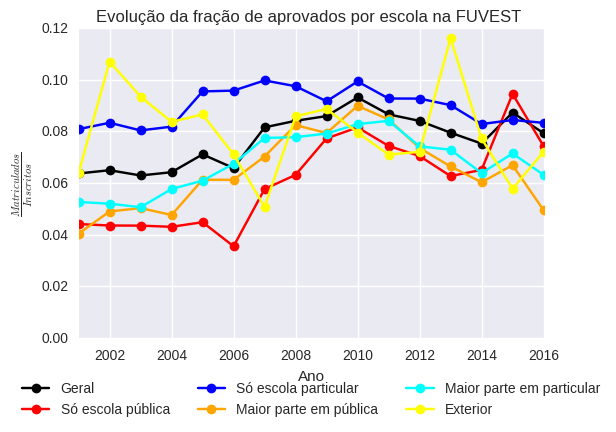

In [238]:
x = []
y_pub = []
y_mpub = []
y_par = []
y_mpar =[]
y_ext = []
y_suple = []
y_geral = []
for i in range(len(res_insc["escola"])):
    ano = res_insc["ano"][i]
    
    row_mat = res_matr["escola"][i]
    row_ins = res_insc["escola"][i]
    y_geral.append(row_mat[0] / row_ins[0])
    if ano >= 2013:
        y_pub.append(row_mat[1] / row_ins[1])
        y_par.append(row_mat[2] / row_ins[2])
        y_mpub.append(row_mat[3] / row_ins[3])
        y_mpar.append(row_mat[4] / row_ins[4])
        y_ext.append(row_mat[5] / row_ins[5])
    elif ano < 2008:
        y_pub.append((row_mat[1] + row_mat[2]) / (row_ins[1] + row_ins[2]))
        y_par.append(row_mat[3] / row_ins[3])
        y_mpub.append(row_mat[4] / row_ins[4])
        y_mpar.append((row_mat[5] + row_mat[6]) / (row_ins[5] + row_ins[6]))
        y_out.append(row_mat[7] / row_ins[7])
        y_ext.append(row_mat[8] / row_ins[8])
    elif ano == 2008:
        y_pub.append((row_mat[1] + row_mat[2] + row_mat[3]) /
                     (row_ins[1] + row_ins[2] + row_ins[3]))
        y_par.append(row_mat[4] / row_ins[4])
        y_mpub.append(row_mat[5] / row_ins[5])
        y_mpar.append((row_mat[6] + row_mat[7]) / (row_ins[6] + row_ins[7]))
        y_ext.append(row_mat[8] / row_ins[8])
    else:
        y_pub.append((row_mat[1] + row_mat[2] + row_mat[3] + row_mat[4]) /
                     (row_ins[1] + row_ins[2] + row_ins[3] + row_ins[4]))
        y_par.append(row_mat[5] / row_ins[5])
        y_mpub.append(row_mat[6] / row_ins[6])
        y_mpar.append((row_mat[7] + row_mat[8]) / (row_ins[7] + row_ins[8]))
        y_ext.append(row_mat[9] / row_ins[9])
    x.append(ano)
    
ax = plt.subplot(111)

plot_generic(x, y_geral, "Geral", "black")
plot_generic(x, y_pub, "Só escola pública", "red")
plot_generic(x, y_par, "Só escola particular", "blue")
plot_generic(x, y_mpub, "Maior parte em pública", "orange")
plot_generic(x, y_mpar, "Maior parte em particular", "cyan")
plot_generic(x, y_ext, "Exterior", "yellow")
ax.ticklabel_format(useOffset=False)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          ncol=3, fancybox=True, shadow=True)
plt.ylim(0, 0.12)
plt.title("Evolução da fração de aprovados por escola na FUVEST ")
plt.xlabel("Ano")
plt.ylabel("$\\frac{Matriculados}{Inscritos}$")
plt.xlim(2001, 2016)
plt.show()

In [225]:
ano

2008